# implementing Neural Network in tensorflow 

In [41]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
%matplotlib inline 



In [42]:
w1_initial=np.random.normal(size=(28*28*1,100)).astype(np.float32)
w2_initial=np.random.normal(size=(100,100)).astype(np.float32)
w3_initial=np.random.normal(size=(100,100)).astype(np.float32)
w4_initial=np.random.normal(size=(100,100)).astype(np.float32)
w5_initial=np.random.normal(size=(100,100)).astype(np.float32)
w6_initial=np.random.normal(size=(100,10)).astype(np.float32)

In [43]:
with tf.device('/gpu:0'):
    def next_batch(batch_size , image , label):

        a=np.random.randint(np.shape(image)[0] -batch_size)
        batch_x = image[a:a+batch_size,:]
        batch_y= label[a:a+batch_size,:]
        return batch_x, batch_y


# Load Image

In [44]:
train_img=np.load('/home/user01/data/train_img.npy')
train_lab=np.load('/home/user01/data/train_lab.npy')
test_img=np.load('/home/user01/data/test_img.npy')
test_lab=np.load('/home/user01/data/test_lab.npy')
val_img=np.load('/home/user01/data/val_img.npy')
val_lab=np.load('/home/user01/data/val_lab.npy')

print np.shape(val_img)

(5000, 28, 28, 1)


[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


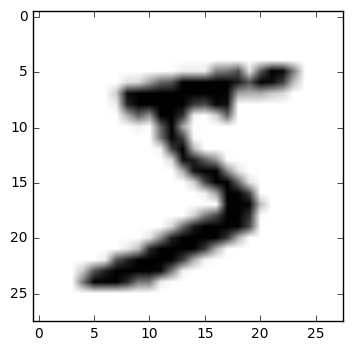

In [45]:

img=np.reshape(val_img[0] ,newshape=[28,28])
lab=val_lab[0]
print lab

plt.imshow(img, cmap='binary' )


# Building graph

In [46]:

x_pre=tf.placeholder(tf.float32 , shape=[None,28,28,1])
x_ = tf.reshape(x_pre , shape=[-1,28*28*1])
y_=tf.placeholder(tf.float32 , shape=[None , 10])


In [47]:
#Layer1 without Batch Normalization  
w1 = tf.Variable(w1_initial)
b1=tf.Variable(tf.zeros([100]))
z1=tf.matmul(x_,w1)+b1
l1=tf.nn.sigmoid(z1)


In [48]:
w2 = tf.Variable(w2_initial)
b2 = tf.zeros([100])
z2 = tf.matmul(l1 , w2)+b2
l2 = tf.nn.sigmoid(z2)


In [49]:
w3 = tf.Variable(w3_initial)
b3 = tf.zeros([100])
z3 = tf.matmul(l2 , w3)+b3
l3 = tf.nn.relu(z3)


In [50]:
w4 = tf.Variable(w4_initial)
b4 = tf.zeros([100])
z4 = tf.matmul(l3 , w4)+b4
l4 = tf.nn.relu(z4)

In [51]:
w5 = tf.Variable(w5_initial)
b5 = tf.zeros([100])
z5 = tf.matmul(l4 , w5)+b5
l5 = tf.nn.relu(z5)

# fully connnected layer

In [52]:
w6 = tf.Variable(w6_initial)
b6 = tf.Variable(tf.zeros([10]))
z6 = tf.matmul(l5 , w6)+b6
y= tf.nn.softmax(z6)



# training

In [53]:
cross_entropy =tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))


train_step =tf.train.GradientDescentOptimizer(0.001).minimize(cross_entropy)

correct_prediction = tf.equal(tf.arg_max(y,1) , tf.arg_max(y_ , 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction , tf.float32))




# Training Nueral Network

In [54]:
zs , BNs , acc, acc_BNs = [],[],[],[]


init=tf.initialize_all_variables()
sess = tf.Session()

sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [55]:
acc,zs,acc_val , zs_val =[],[],[],[]
print z2.get_shape()
start_time=time.time()
for i in range(10000):

    batch_xs , batch_ys =next_batch( 60 , train_img , train_lab) 
    sess.run( train_step , feed_dict ={ x_pre: batch_xs , y_ :batch_ys })
    if i%50 is 0:
        train_res = sess.run([accuracy , z1 ] , feed_dict = {x_pre:batch_xs, y_ : batch_ys})
        val_res   = sess.run([accuracy , z1 ] , feed_dict = {x_pre:val_img, y_ : val_lab})
        
        print 'step:',i, 'training',train_res[0],'validation' , val_res[0] 
        acc.append(train_res[0])
        #print np.shape(train_res[1])
        #print np.mean(train_res[1])
        
        zs.append(np.mean(train_res[1] , axis=0))
        print np.shape(zs)
        acc_val.append(val_res[0])
        zs_val.append(np.mean(val_res[1] , axis=0))            
end_time=time.time()
zs , val_zs , acc, acc_val = np.array(zs) , np.array(zs_val) , np.array(acc) , np.array(acc_val)
#when we test , through using above 4 parameter we get more higher accuracy 
test_res = sess.run([accuracy , z1 ] , feed_dict = {x_pre:test_img, y_ : test_lab})
print 'test accuracy : ' , test_res[0] 
print 'The time taken by Training: ',end_time - start_time

(?, 100)
step: 0 training 0.05 validation 0.0958
(1, 100)
step: 50 training 0.15 validation 0.0958
(2, 100)
step: 100 training 0.15 validation 0.0958
(3, 100)
step: 150 training 0.1 validation 0.0958
(4, 100)
step: 200 training 0.116667 validation 0.0958
(5, 100)
step: 250 training 0.1 validation 0.0958
(6, 100)
step: 300 training 0.0833333 validation 0.0958
(7, 100)
step: 350 training 0.116667 validation 0.0958
(8, 100)
step: 400 training 0.0833333 validation 0.0958
(9, 100)
step: 450 training 0.05 validation 0.0958
(10, 100)
step: 500 training 0.116667 validation 0.0958
(11, 100)
step: 550 training 0.133333 validation 0.0958
(12, 100)
step: 600 training 0.05 validation 0.0958
(13, 100)
step: 650 training 0.133333 validation 0.0958
(14, 100)
step: 700 training 0.133333 validation 0.0958
(15, 100)
step: 750 training 0.0833333 validation 0.0958
(16, 100)
step: 800 training 0.0833333 validation 0.0958
(17, 100)
step: 850 training 0.116667 validation 0.0958
(18, 100)
step: 900 training 0.

In [56]:
print np.shape(zs)

(200, 100)


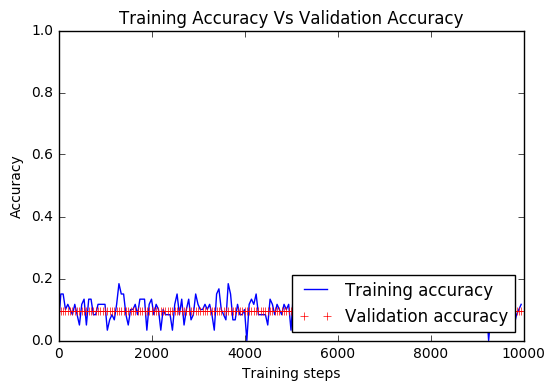

In [57]:

fig ,ax = plt.subplots()

ax.plot(range(0,len(acc)*50 , 50) , acc , label='Training accuracy')
ax.plot(range(0,len(acc)*50 , 50) ,acc_val , 'r+',label='Validation accuracy' )

ax.set_xlabel('Training steps')
ax.set_ylabel('Accuracy')
ax.set_ylim([0,1])
ax.set_title("Training Accuracy Vs Validation Accuracy")
ax.legend(loc=4)
plt.show()
        
        
        

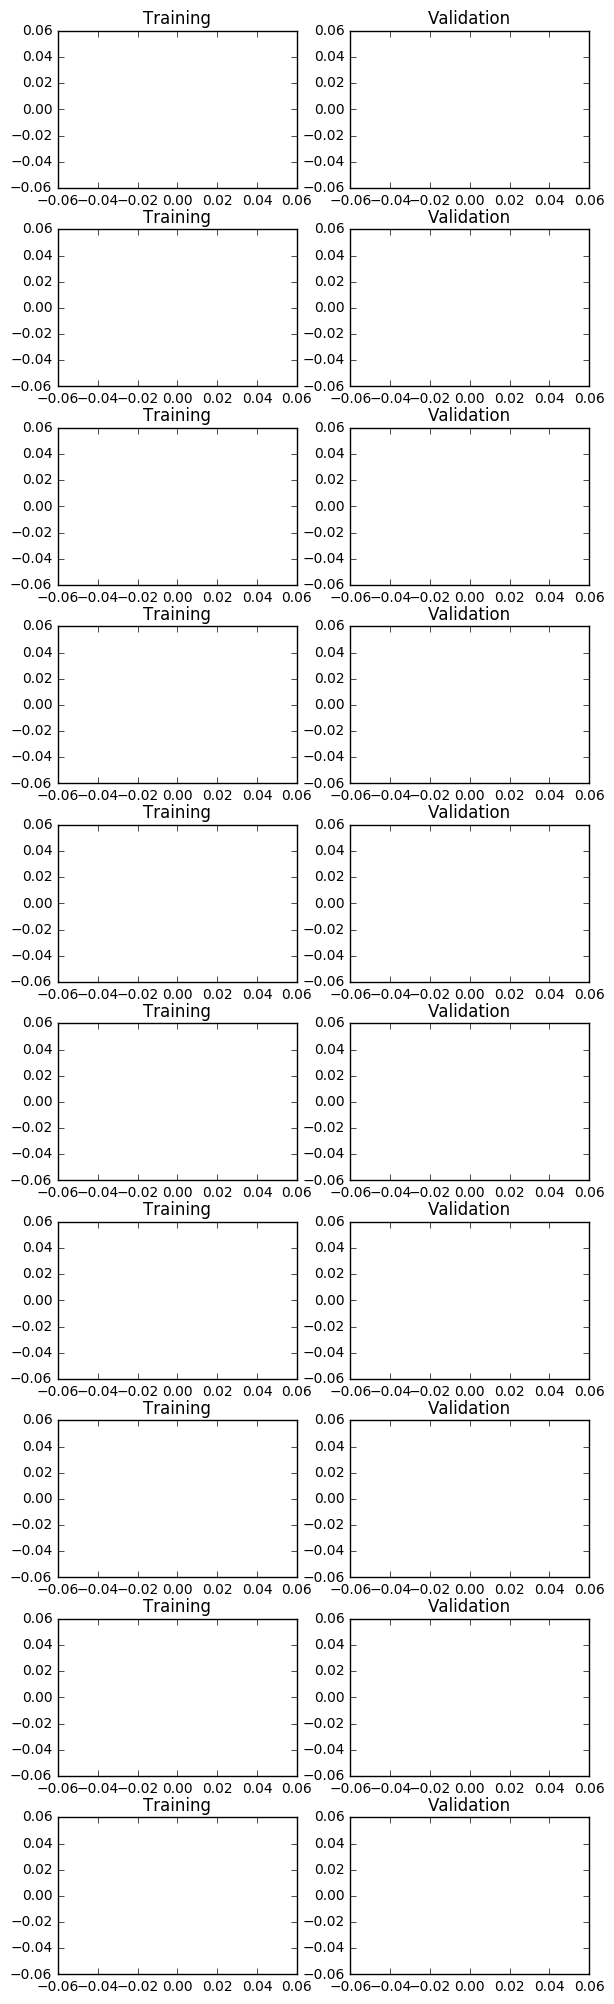

In [58]:

fig ,axes = plt.subplots(10,2 , figsize=(6,20))
fig.tight_layout()

for i , ax  in enumerate(axes):
    ax[0].set_title("Training")
    ax[1].set_title("Validation")
    ax[0].plot(zs[:,i])
    ax[1].plot(val_zs[:,i])